**Task:** Data analysis of a Titanic dataset with Pandas.

**Deadline:** due 23:59 16.09.2016

Please add your surname to the name of this ipynb file

Download Titanic dataset from **biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls**

In [1]:
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


'%.6f'

In [2]:
# import mpld3
# mpld3.enable_notebook()

Load data to pandas dataframe

In [3]:
import pandas as pd

In [4]:
import seaborn as sn

In [5]:
titanic_data = pd.read_excel("titanic3.xls")

In [6]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Please, answer the following questions with code and output or visualizations below each question.

### What  is  the  passenger  sex  distribution? 

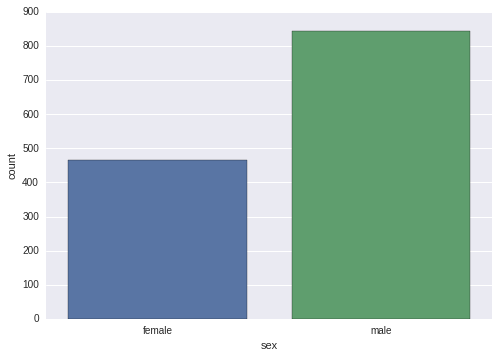

In [7]:
sn.countplot(x="sex",data=titanic_data);

### What  is  the  passenger  service  class  distribution? 

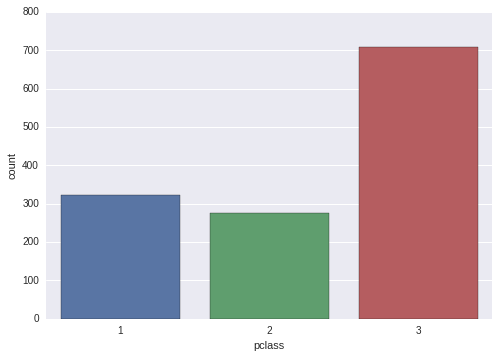

In [8]:
sn.countplot(x="pclass",data=titanic_data);

### How  does  the  mean  male  age  change  in  dependence  on  service  class? 

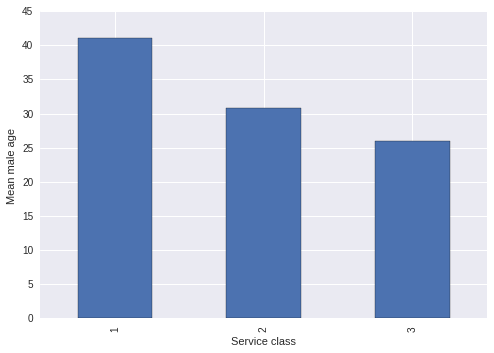

In [32]:
mean_male_age_bar = titanic_data[titanic_data.sex == "male"]\
    .pivot_table(values="age",columns='sex',index="pclass",aggfunc=np.mean)\
    .plot.bar(legend=False)
mean_male_age_bar.set_ylabel("Mean male age");
mean_male_age_bar.set_xlabel("Service class");

### How  does  the  mean  female  age  change  in  dependence  on  service  class? 

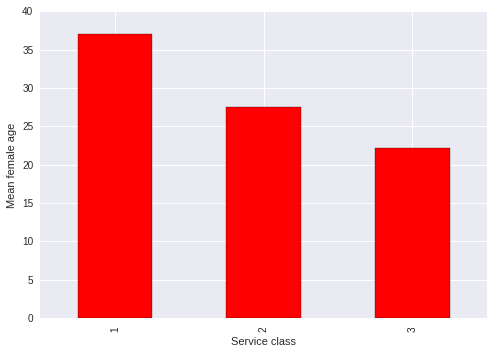

In [10]:
mean_female_age_bar = titanic_data[titanic_data.sex == "female"]\
    .pivot_table(values="age",columns='sex',index="pclass",aggfunc=np.mean)\
    .plot.bar(legend=False,colormap='prism')
mean_female_age_bar.set_ylabel("Mean female age");
mean_female_age_bar.set_xlabel("Service class");

### What  is  the  proportion  of  survived  passengers?

In [11]:
len(titanic_data[titanic_data.survived==1]) / len(titanic_data)

0.381971

### Is  it  true,  that  younger  passengers  survived  more  frequently  than  older passengers?

In [12]:
from math import floor
ages = titanic_data.age
mean_age = (ages.max() - ages.min())/2
print("Mean age: {:.0f}".format(mean_age))
young_sels = titanic_data.age < mean_age
old_sels = ~young_sels & titanic_data.age.notnull().values #last condition to exclude NaN ages

print("Ratio of survived people under {:.0f}: {:.3f}"\
      .format(mean_age,titanic_data[young_sels].survived.value_counts(normalize=True)[1]))
print("Ratio of survived people over {:.0f}: {:.3f}"\
      .format(mean_age,titanic_data[old_sels].survived.value_counts(normalize=True)[1]))

Mean age: 40
Ratio of survived people under 40: 0.413
Ratio of survived people over 40: 0.392


As you can see, ratio of survived among young people (under 40 age) is more than ratio of survived among old people (over 40 age). Thus, younger passengers survived more frequently than older ones.

### Is  it  true,  that  women  survived  more  frequently? 

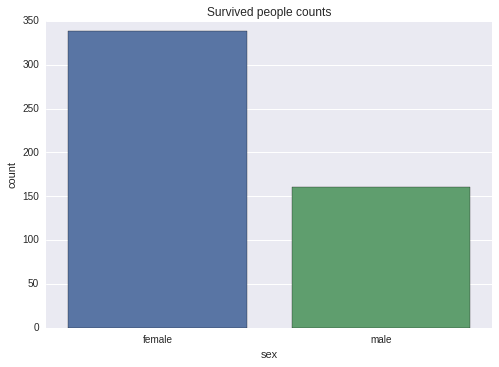

In [13]:
bar = sn.countplot(x="sex",data=titanic_data[titanic_data.survived==1]);
bar.set_title("Survived people counts");

As you can see, women survived more frequently.

### What  is  the  mean  of  the  fare?  What  is  the  variance  of  the  fare? 

In [14]:
print("Mean: {:.3f}".format(titanic_data.fare.mean()))
print("Variance: {:.3f}".format(titanic_data.fare.var()))

Mean: 33.295
Variance: 2678.960


### Is  it  true,  that  passengers  with  more  expensive  tickets  survived  more frequently?

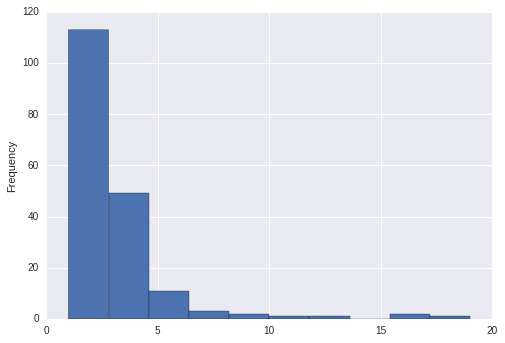

In [60]:
titanic_data[titanic_data.survived==1].pivot_table(values="survived",index="fare",aggfunc=np.sum).plot.hist();

### What  is  most  popular  male  name  on  the  ship? 

In [29]:
from collections import Counter
import re

names = map(lambda name: re.split('\W+',name)[2],titanic_data[titanic_data.sex=="male"].name)
print("The most popular male name is: {}".format(Counter(names).most_common(1)[0][0]))

The most popular male name is: William
